In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
# prepare data for clustering
import pandas as pd
data = pd.read_csv('Transactions.csv')
clustering_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

In [23]:
# normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data.drop(columns=['CustomerID']))

In [27]:
# Determine optimal clusters using Elbow Method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

C:\Users\diya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

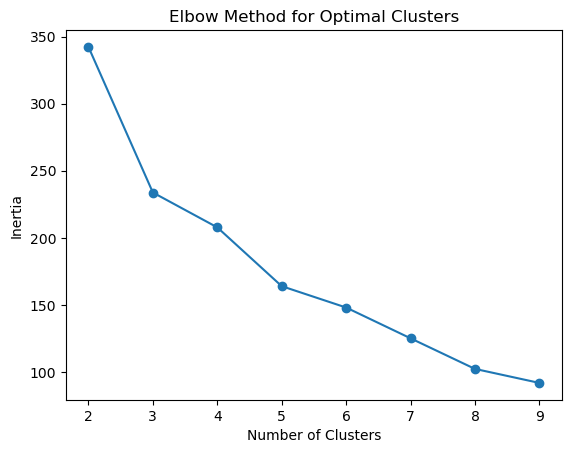

In [29]:
# Plot Elbow Method
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
# Apply K-Means Clustering
optimal_clusters = 4  # Choose based on elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\diya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
# Evaluate Clustering with DB Index
db_index = davies_bouldin_score(scaled_data, clustering_data['Cluster'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.1218019122669298


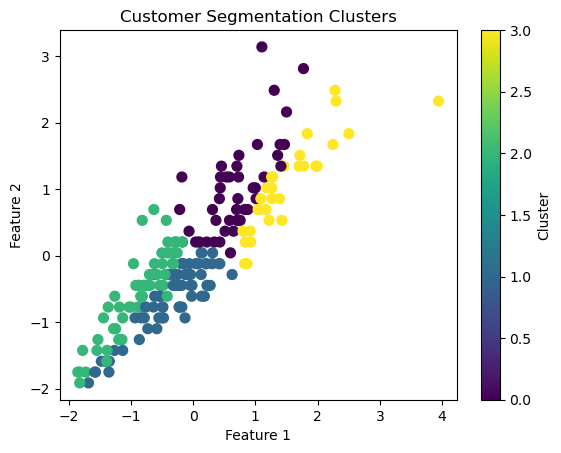

In [35]:
# Visualize clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clustering_data['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()